In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [20]:
csv_files = [
    "ISS(ZARYA)_25544_data.csv",
    "ASTRA 2F_38778_data.csv",
    "ARIANE 5 DEB (SYLDA)_44336_data.csv",
    "SL-8 DEB_4084_data.csv"
]
dataframes = {}
for file_name in csv_files:
    filepath = "DATASET/"+file_name
    df_name=file_name.replace(".csv","")
    dataframes[df_name] = pd.read_csv(filepath)
    print(f"{df_name} (Shape: {dataframes[df_name].shape})")

ISS(ZARYA)_25544_data (Shape: (4540, 32))
ASTRA 2F_38778_data (Shape: (1677, 32))
ARIANE 5 DEB (SYLDA)_44336_data (Shape: (1768, 32))
SL-8 DEB_4084_data (Shape: (1383, 32))


In [21]:
for name, df in dataframes.items():
    print(f"=== {name.upper()} ===")
    print("\nNull values:\n",round(df.isnull().sum()/ df.shape[0] * 100))
    print("\nData types:\n", df.dtypes)
    print("\nData description:\n", df.describe())
    print("\nColumns:\n", df.columns)
    print("\n" + "="*50 + "\n")

=== ISS(ZARYA)_25544_DATA ===

Null values:
 COMMENT                0.0
ORIGINATOR             0.0
NORAD_CAT_ID           0.0
OBJECT_NAME            0.0
OBJECT_TYPE            0.0
CLASSIFICATION_TYPE    0.0
INTLDES                0.0
EPOCH                  0.0
EPOCH_MICROSECONDS     0.0
MEAN_MOTION            0.0
ECCENTRICITY           0.0
INCLINATION            0.0
RA_OF_ASC_NODE         0.0
ARG_OF_PERICENTER      0.0
MEAN_ANOMALY           0.0
EPHEMERIS_TYPE         0.0
ELEMENT_SET_NO         0.0
REV_AT_EPOCH           0.0
BSTAR                  0.0
MEAN_MOTION_DOT        0.0
MEAN_MOTION_DDOT       0.0
FILE                   0.0
TLE_LINE0              0.0
TLE_LINE1              0.0
TLE_LINE2              0.0
OBJECT_ID              0.0
OBJECT_NUMBER          0.0
SEMIMAJOR_AXIS         0.0
PERIOD                 0.0
APOGEE                 0.0
PERIGEE                0.0
DECAYED                0.0
dtype: float64

Data types:
 COMMENT                 object
ORIGINATOR              object


## Orbital Stability
- **INCLINATION**: Very stable with a standard deviation of only **0.002056**.
- **SEMIMAJOR_AXIS**: Very stable with a standard deviation of **1.547024**.
- **PERIOD**: Very stable with a standard deviation of **0.031734**.
- **MEAN_MOTION**: Very stable with a standard deviation of **0.005294**.

## Variability in Certain Columns
- **RA_OF_ASC_NODE**: High variability with a standard deviation of **105.642251**, likely due to orbital precession.
- **ARG_OF_PERICENTER**: High variability with a standard deviation of **116.356581**, indicating significant variations in the argument of perigee.
- **MEAN_ANOMALY**: High variability with a standard deviation of **108.566872**, indicating significant variations in the mean anomaly.

## Low Eccentricity
- **ECCENTRICITY**: Very low on average (**0.000538**) with a standard deviation of **0.000271**, indicating a nearly circular orbit.

## Drag Coefficient (BSTAR)
- **BSTAR**: Very low average (**0.000290**) but with a standard deviation of **0.002100**, which may indicate variations in atmospheric drag or other factors affecting satellite motion.

## Cleaning constants

In [22]:
for name, df in dataframes.items():
    constant_cols = [col for col in df.columns if df[col].nunique() == 1 and (col not in ['NORAD_CAT_ID','OBJECT_NAME','OBJECT_TYPE'])]
    print(f"Constant columns in {name}: {constant_cols}")
    df.drop(columns=constant_cols, inplace=True)

Constant columns in ISS(ZARYA)_25544_data: ['COMMENT', 'ORIGINATOR', 'CLASSIFICATION_TYPE', 'INTLDES', 'EPHEMERIS_TYPE', 'ELEMENT_SET_NO', 'MEAN_MOTION_DDOT', 'TLE_LINE0', 'OBJECT_ID', 'OBJECT_NUMBER', 'DECAYED']
Constant columns in ASTRA 2F_38778_data: ['COMMENT', 'ORIGINATOR', 'CLASSIFICATION_TYPE', 'INTLDES', 'EPHEMERIS_TYPE', 'ELEMENT_SET_NO', 'BSTAR', 'MEAN_MOTION_DDOT', 'TLE_LINE0', 'OBJECT_ID', 'OBJECT_NUMBER', 'DECAYED']
Constant columns in ARIANE 5 DEB (SYLDA)_44336_data: ['COMMENT', 'ORIGINATOR', 'CLASSIFICATION_TYPE', 'INTLDES', 'EPHEMERIS_TYPE', 'ELEMENT_SET_NO', 'MEAN_MOTION_DDOT', 'TLE_LINE0', 'OBJECT_ID', 'OBJECT_NUMBER', 'DECAYED']
Constant columns in SL-8 DEB_4084_data: ['COMMENT', 'ORIGINATOR', 'CLASSIFICATION_TYPE', 'INTLDES', 'EPHEMERIS_TYPE', 'ELEMENT_SET_NO', 'MEAN_MOTION_DDOT', 'TLE_LINE0', 'OBJECT_ID', 'OBJECT_NUMBER', 'DECAYED']


## Dropping Useless columns  (Metadata)

In [23]:
for name, df in dataframes.items():
    cols_to_drop = [col for col in ['REV_AT_EPOCH','FILE', 'TLE_LINE1', 'TLE_LINE2'] if col in df.columns]
    if cols_to_drop:
        print(f"Dropping {cols_to_drop} from {name}")
        df.drop(columns=cols_to_drop, inplace=True)

Dropping ['REV_AT_EPOCH', 'FILE', 'TLE_LINE1', 'TLE_LINE2'] from ISS(ZARYA)_25544_data
Dropping ['REV_AT_EPOCH', 'FILE', 'TLE_LINE1', 'TLE_LINE2'] from ASTRA 2F_38778_data
Dropping ['REV_AT_EPOCH', 'FILE', 'TLE_LINE1', 'TLE_LINE2'] from ARIANE 5 DEB (SYLDA)_44336_data
Dropping ['REV_AT_EPOCH', 'FILE', 'TLE_LINE1', 'TLE_LINE2'] from SL-8 DEB_4084_data


## Conversion of Epoch in DateTime

In [24]:
for name, df in dataframes.items():
    if 'EPOCH' in df.columns:
        print(f"Converting 'EPOCH' to datetime in {name}")
        df['EPOCH'] = pd.to_datetime(df['EPOCH'])

Converting 'EPOCH' to datetime in ISS(ZARYA)_25544_data
Converting 'EPOCH' to datetime in ASTRA 2F_38778_data
Converting 'EPOCH' to datetime in ARIANE 5 DEB (SYLDA)_44336_data
Converting 'EPOCH' to datetime in SL-8 DEB_4084_data


## Merge Dataset

In [25]:
df_iss = dataframes["ISS(ZARYA)_25544_data"].copy()
df_astra_2f = dataframes["ASTRA 2F_38778_data"].copy()
df_ariane_5_deb = dataframes["ARIANE 5 DEB (SYLDA)_44336_data"].copy()
df_sl8_deb = dataframes["SL-8 DEB_4084_data"].copy()

df_combined = pd.concat([df_iss, df_astra_2f], ignore_index=True)
df_combined.head()

,NORAD_CAT_ID,OBJECT_NAME,OBJECT_TYPE,EPOCH,EPOCH_MICROSECONDS,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,BSTAR,MEAN_MOTION_DOT,SEMIMAJOR_AXIS,PERIOD,APOGEE,PERIGEE
0,25544,ISS (ZARYA),PAYLOAD,2023-01-01 06:28:40,541088,15.498110,0.000520,51.6448,75.3411,209.5406,257.0907,0.000289,0.000160,6795.415,92.915,420.817,413.744
1,25544,ISS (ZARYA),PAYLOAD,2023-01-01 12:46:48,697248,15.498233,0.000521,51.6444,74.0407,211.7305,280.9843,0.000302,0.000167,6795.379,92.914,420.786,413.703
2,25544,ISS (ZARYA),PAYLOAD,2023-01-01 17:28:45,194304,15.498321,0.000515,51.6445,73.0716,212.0396,293.8042,0.000310,0.000172,6795.354,92.913,420.721,413.717
3,25544,ISS (ZARYA),PAYLOAD,2023-01-02 00:52:04,330272,15.498430,0.000516,51.6446,71.5466,213.3191,211.3400,0.000310,0.000172,6795.322,92.913,420.696,413.678
4,25544,ISS (ZARYA),PAYLOAD,2023-01-02 05:40:34,178880,15.498507,0.000513,51.6447,70.5542,214.4037,248.8124,0.000313,0.000173,6795.299,92.912,420.650,413.679


# 1. Correlation between variables

In [26]:
def matrice_corr_comparative(df_combined, features):
    objects = df_combined['OBJECT_NAME'].unique()
    n_objects = len(objects)

    n_cols = 2
    n_rows = (n_objects + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 9, n_rows * 8))
    axes = axes.flatten()

    for i, obj_name in enumerate(objects):
        ax = axes[i]

        df_obj = df_combined[df_combined['OBJECT_NAME'] == obj_name]

        corr_matrix = df_obj[features].corr()

        sns.heatmap(
            corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='vlag',
            vmin=-1, vmax=1,
            ax=ax,
            linewidths=.5,
            annot_kws={"size": 8}
        )

        ax.set_title(f'Correlation matrix - {obj_name}', fontsize=14)

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout(pad=3.0)
    plt.show()

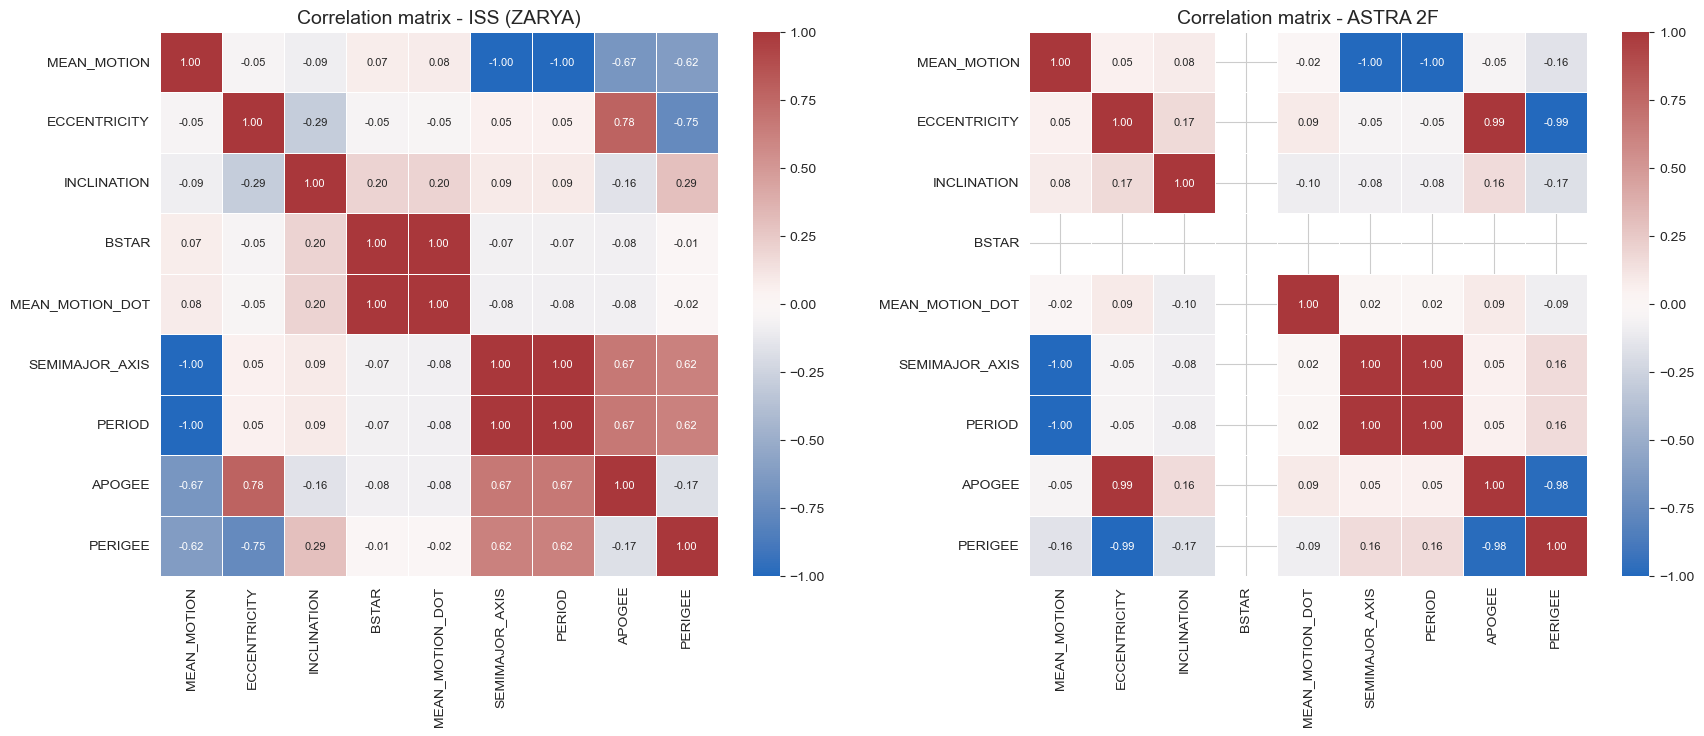

In [27]:
key_cols = ['MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'BSTAR',
            'MEAN_MOTION_DOT', 'SEMIMAJOR_AXIS', 'PERIOD', 'APOGEE', 'PERIGEE']
matrice_corr_comparative(df_combined, key_cols)

# Physical Relationships Between Orbital Variables

---

### **Period – Semimajor Axis (Kepler's Third Law)**
$$
T = 2\pi \sqrt{\frac{a^3}{\mu}}
$$
- $ T $: Orbital period (**PERIOD**)
- $ a $: Semimajor axis (**SEMIMAJOR_AXIS**)
- $ \mu = GM $: Standard gravitational parameter of the central body (Earth for satellites)

---

### **Mean Motion – Semimajor Axis**
$$
n = \sqrt{\frac{\mu}{a^3}}
$$
- $ n $: Mean motion (**MEAN_MOTION**), or the number of orbits per unit time

---

### **Period – Mean Motion**
$$
T = \frac{2\pi}{n}
$$

---

### **Apogee, Perigee, Semimajor Axis, and Eccentricity**
$$
\begin{align*}
r_{\text{apogee}} &= a(1 + e) \\
r_{\text{perigee}} &= a(1 - e)
\end{align*}
$$
- $ e $: Eccentricity (**ECCENTRICITY**)
- $ r_{\text{apogee}} $: Apogee distance (**APOGEE**)
- $ r_{\text{perigee}} $: Perigee distance (**PERIGEE**)

---

### **Mean Motion Variation ($\dot{n}$), Drag (BSTAR), and Altitude Decay**
- $\dot{n}$ (**MEAN_MOTION_DOT**) and **BSTAR** (drag coefficient) describe the rate of orbital decay due to atmospheric drag, affecting the semimajor axis and thus the period over time:
$$
\frac{da}{dt} \sim -\frac{2a^2}{n\mu} F_D
$$
- The drag force $ F_D $ is modeled using **BSTAR**.

---

## 2. Orbital Trajectories Visualization Over Time

In [28]:
def plot_traj_orbitale_comparative(df_combined, feature):

    print(f"Displaying evolution of: {feature}")

    g = sns.relplot(
        data=df_combined,
        x='EPOCH',
        y=feature,
        hue='OBJECT_NAME',
        col='OBJECT_NAME',
        col_wrap=2,
        kind='line',
        height=4,
        aspect=2,
        palette='tab10',
        lw=1,
        facet_kws={'sharey': False, 'sharex': True}
    )

    g.fig.suptitle(f'Temporal evolution of {feature} (by Object)', y=1.03, fontsize=16)
    g.set_axis_labels('Date (EPOCH)', feature)

    plt.show()

Displaying evolution of: APOGEE


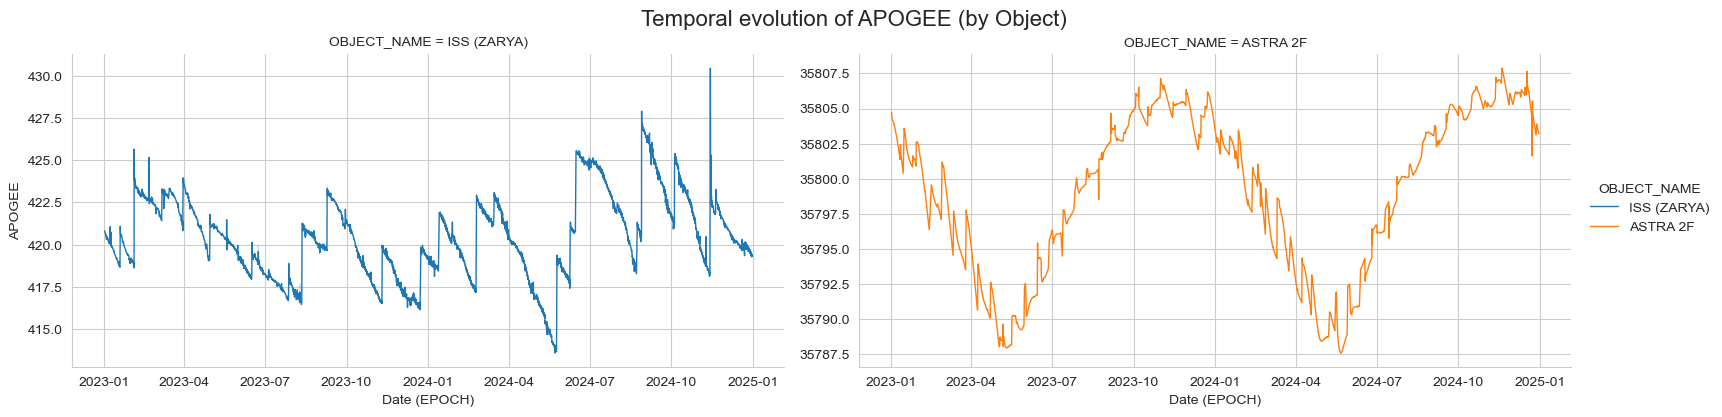

Displaying evolution of: PERIGEE


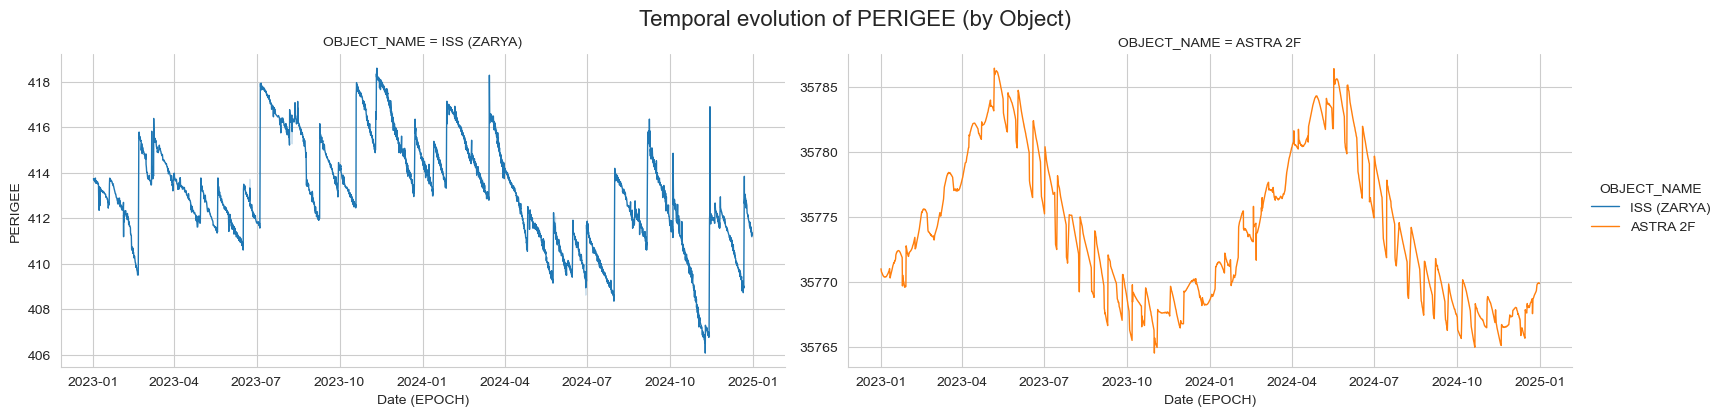

Displaying evolution of: MEAN_MOTION


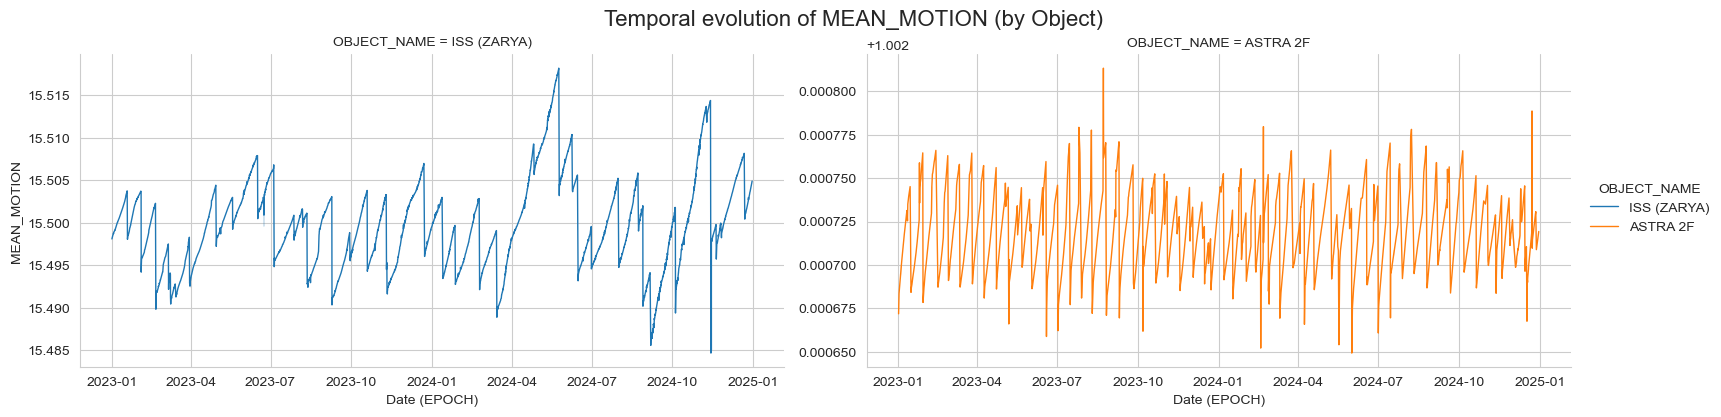

Displaying evolution of: ECCENTRICITY


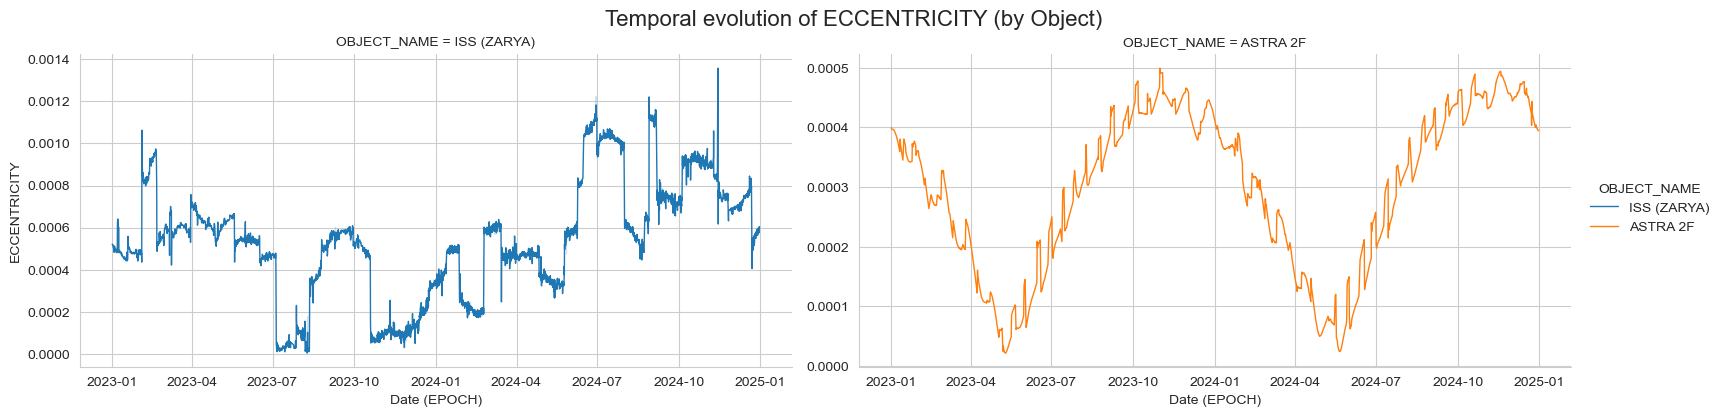

In [29]:
plot_traj_orbitale_comparative(df_combined, "APOGEE")
plot_traj_orbitale_comparative(df_combined, "PERIGEE")
plot_traj_orbitale_comparative(df_combined, "MEAN_MOTION")
plot_traj_orbitale_comparative(df_combined, "ECCENTRICITY")

## 3. Data Quality: The Histogram of Temporal Gaps

=== ANALYSIS FOR 2 OBJETS ===

--- ISS (ZARYA) ---
Average gap:   4.16h
Median gap:    3.47h
Min gap:       0.00h
Max gap:       58.75h
Standard dev:  3.28h
Number of TLE: 4208

--- ASTRA 2F ---
Average gap:   11.39h
Median gap:    9.34h
Min gap:       0.98h
Max gap:       91.21h
Standard dev:  8.07h
Number of TLE: 1537



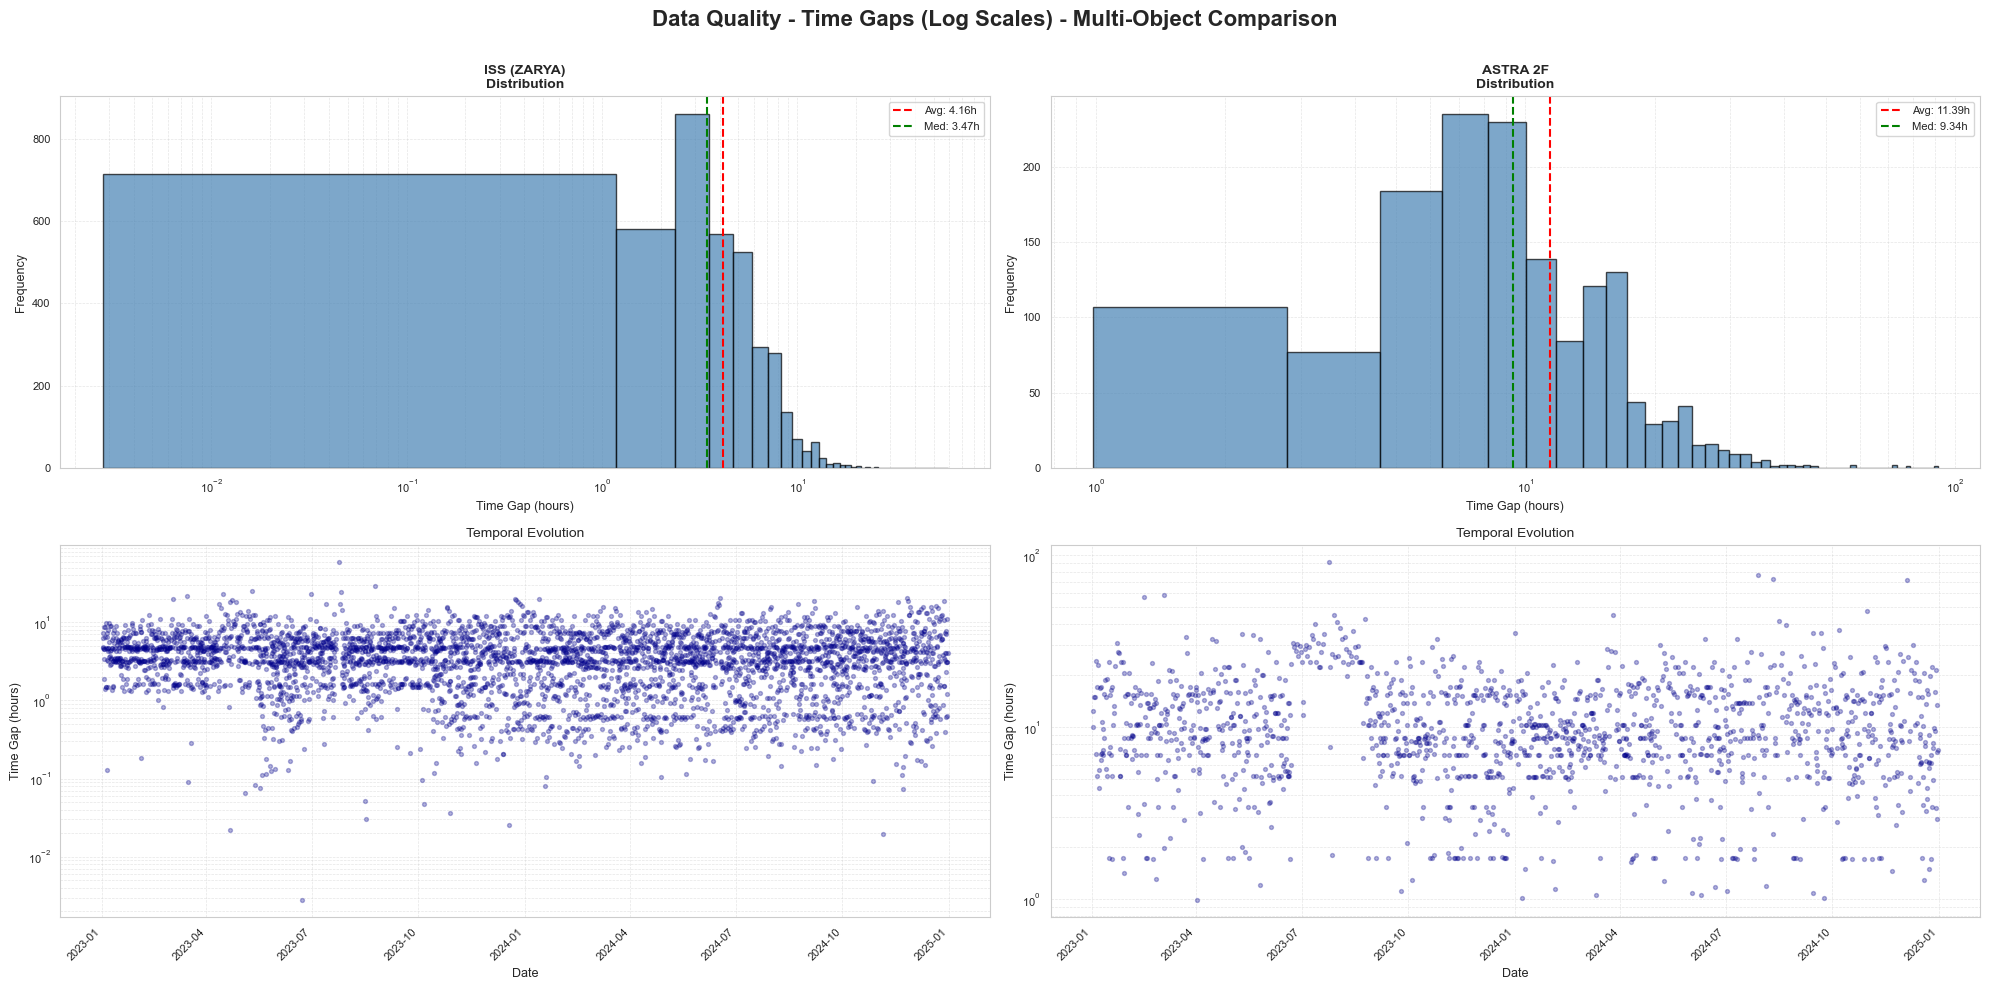

In [30]:
def histo_ecart_tempo_multi(df_combined):

    objects = df_combined['OBJECT_NAME'].unique()
    n_objects = len(objects)

    print(f"=== ANALYSIS FOR {n_objects} OBJETS ===\n")

    fig = plt.figure(figsize=(20, 10))

    for idx, obj_name in enumerate(objects):
        df_obj = df_combined[df_combined['OBJECT_NAME'] == obj_name].copy()
        df_obj = df_obj.sort_values('EPOCH').reset_index(drop=True)

        time_diffs_hours = df_obj['EPOCH'].diff().dt.total_seconds() / 3600

        clean_time_diffs = time_diffs_hours.dropna()
        clean_time_diffs = clean_time_diffs[clean_time_diffs > 0]

        aligned_dates = df_obj['EPOCH'][clean_time_diffs.index]

        mean_val = clean_time_diffs.mean()
        median_val = clean_time_diffs.median()
        min_val = clean_time_diffs.min()
        max_val = clean_time_diffs.max()
        std_val = clean_time_diffs.std()

        print(f'--- {obj_name} ---')
        print(f'Average gap:   {mean_val:.2f}h')
        print(f'Median gap:    {median_val:.2f}h')
        print(f'Min gap:       {min_val:.2f}h')
        print(f'Max gap:       {max_val:.2f}h')
        print(f'Standard dev:  {std_val:.2f}h')
        print(f'Number of TLE: {len(clean_time_diffs)}\n')

        ax1 = plt.subplot(2, n_objects, idx + 1)
        ax1.hist(clean_time_diffs, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
        ax1.set_xlabel('Time Gap (hours)', fontsize=9)
        ax1.set_ylabel('Frequency', fontsize=9)
        ax1.set_title(f'{obj_name}\nDistribution', fontsize=10, fontweight='bold')
        ax1.set_xscale('log')
        ax1.axvline(mean_val, color='red', linestyle='--', linewidth=1.5,
                    label=f'Avg: {mean_val:.2f}h')
        ax1.axvline(median_val, color='green', linestyle='--', linewidth=1.5,
                    label=f'Med: {median_val:.2f}h')
        ax1.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.5)
        ax1.legend(fontsize=8)
        ax1.tick_params(labelsize=8)

        ax2 = plt.subplot(2, n_objects, n_objects + idx + 1)
        ax2.scatter(aligned_dates, clean_time_diffs, alpha=0.3, s=8, color='darkblue')
        ax2.set_xlabel('Date', fontsize=9)
        ax2.set_ylabel('Time Gap (hours)', fontsize=9)
        ax2.set_title('Temporal Evolution', fontsize=10)
        ax2.set_yscale('log')
        plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=7)
        ax2.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.5)
        ax2.tick_params(labelsize=8)

    plt.suptitle('Data Quality - Time Gaps (Log Scales) - Multi-Object Comparison',
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout(rect=[0, 0.01, 1, 0.99])
    plt.show()

histo_ecart_tempo_multi(df_combined)

## 4. Distributions (KDE)

In [31]:
def kde_distrib_comparative(df_combined, feature):
    print(f"--- Distribution analysis: {feature} ---")

    g = sns.displot(
        data=df_combined,
        x=feature,
        col="OBJECT_NAME",
        col_wrap=3,
        kind="kde",
        fill=True,
        rug=False,
        height=4,
        aspect=1.5,
        facet_kws={'sharex': False, 'sharey': False}
    )

    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle(f'Comparative distribution of: {feature}', fontsize=16)

    for ax in g.axes.flat:
        # Bug with groupby which order is not guaranteed
        title = ax.get_title()
        obj_name = title.split('=')[-1].strip()
        sub_df = df_combined[df_combined["OBJECT_NAME"] == obj_name]
        mean_val = sub_df[feature].mean()
        std_val = sub_df[feature].std()
        ax.text(0.95, 0.95, f'μ={mean_val:.6f}\nσ={std_val:.6f}',
                transform=ax.transAxes, ha='right', va='top', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

    plt.show()

--- Distribution analysis: MEAN_MOTION ---


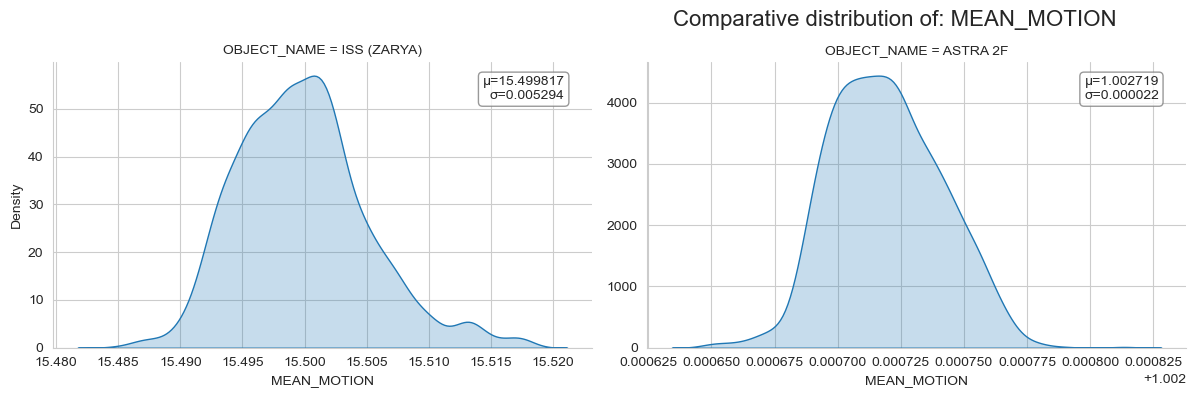

--- Distribution analysis: ECCENTRICITY ---


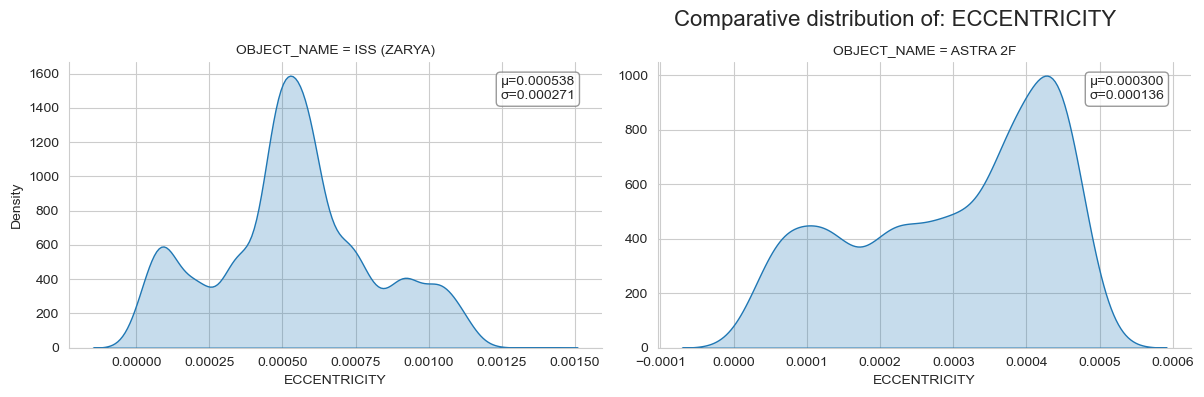

--- Distribution analysis: INCLINATION ---


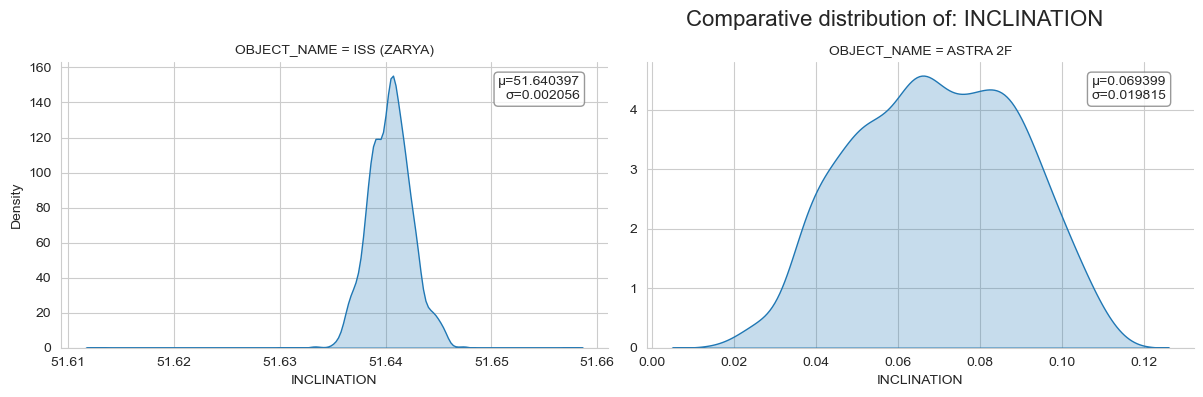

In [32]:
kde_distrib_comparative(df_combined, 'MEAN_MOTION')
kde_distrib_comparative(df_combined, 'ECCENTRICITY')
kde_distrib_comparative(df_combined, 'INCLINATION')


## 5. Scatter Plots

In [33]:
def scatter_plot_comparative(df_combined, feature1, feature2):
    g = sns.relplot(
        data=df_combined,
        x=feature1,
        y=feature2,
        hue='OBJECT_NAME',
        col='OBJECT_NAME',
        col_wrap=2,
        palette='tab10',
        alpha=0.6,
        facet_kws={'sharey': False, 'sharex': False}
    )
    g.fig.suptitle(f'{feature1} vs {feature2} (by Objet)', y=1.03, fontsize=16)

    plt.show()

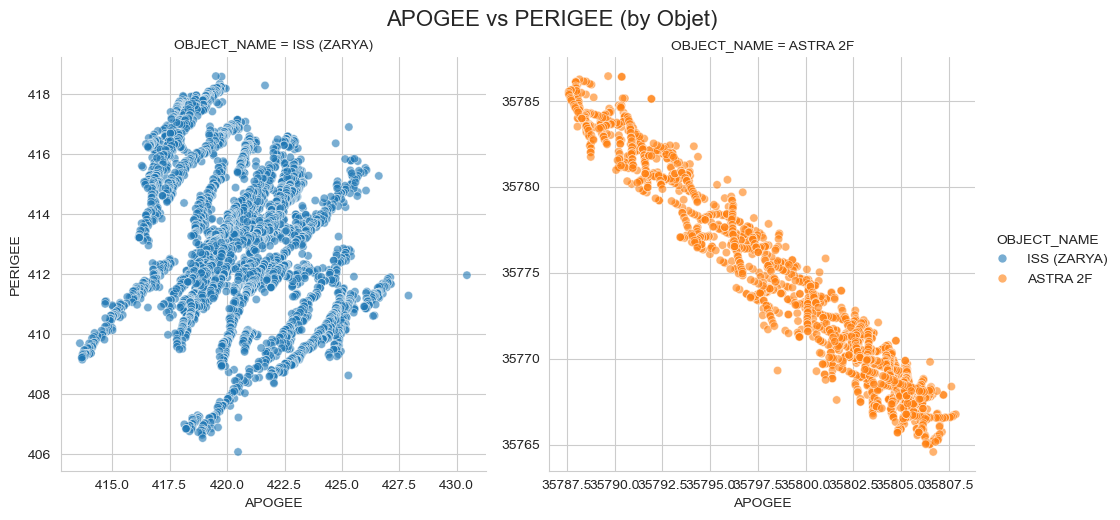

In [34]:
scatter_plot_comparative(df_combined, 'APOGEE', 'PERIGEE')

## 6. Polar Chart

In [35]:
def plot_polar_raan_comparative_with_epoch(df_combined):

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='polar')

    objects = df_combined['OBJECT_NAME'].unique()
    colors = plt.cm.tab10(np.linspace(0, 1, len(objects)))

    for i, obj in enumerate(objects):
        df_obj = df_combined[df_combined['OBJECT_NAME'] == obj]

        theta = np.deg2rad(df_obj['RA_OF_ASC_NODE'])

        epoch_numeric = df_obj['EPOCH'].astype(np.int64)

        min_epoch = epoch_numeric.min()
        max_epoch = epoch_numeric.max()

        if max_epoch == min_epoch:
             r = np.full_like(theta, 1.0)
        else:
             r = 0.2 + 0.8 * (epoch_numeric - min_epoch) / (max_epoch - min_epoch)

        ax.scatter(theta, r, label=obj, s=10, alpha=0.7, color=colors[i])

    ax.set_title("Orbital Precession: RAAN vs. Time (Epoch)", va='bottom', fontsize=16)

    ax.set_rticks([0.2, 0.6, 1.0])
    ax.set_rlabel_position(22.5)
    ax.set_rlim(0, 1.1)

    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)

    plt.legend(bbox_to_anchor=(1.1, 1.1))
    plt.show()

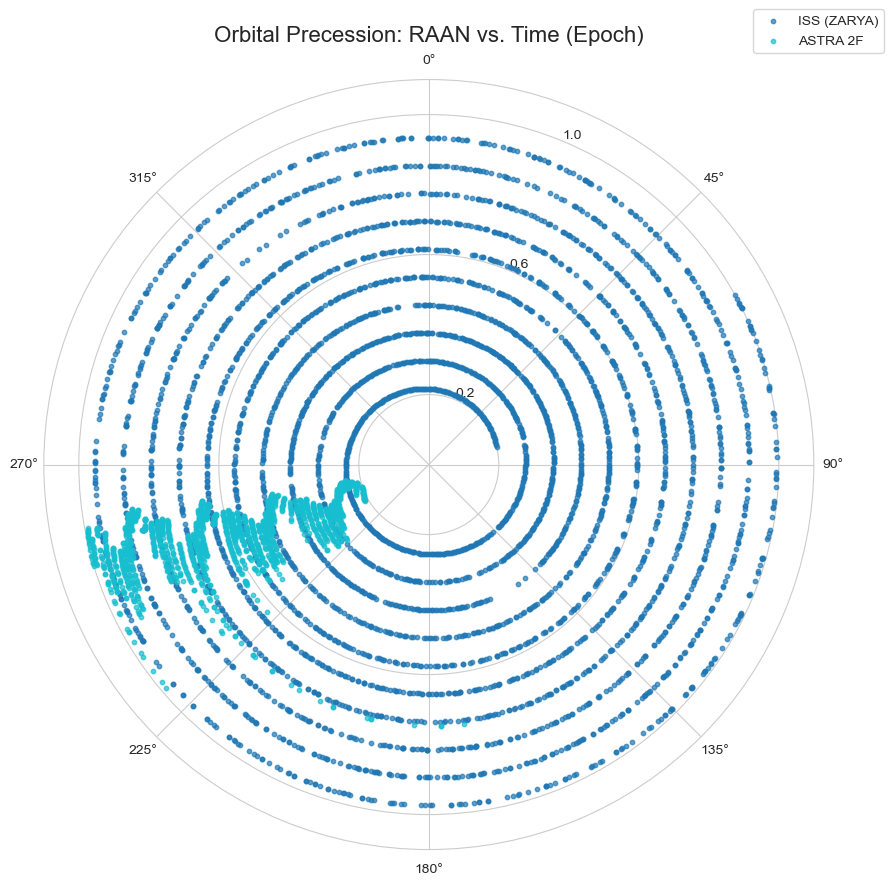

In [36]:
plot_polar_raan_comparative_with_epoch(df_combined)